#**Assignment 4**

Author - Anirudh Sampath Kumar

NUID - 002762139

##**Abstract**

*A* retail company wants to comprehend and interpret the purchase behavior of their customers, with respect to various products belonging to different categories, for the Black Friday sale. The data available for the company is the purchase summary of customers which includes customer demographics, product information, the total purchase amount, for chosen high volume products sold during the Black Friday period of last year.

The objective is developing a model to make predictions on the purchasing capacity of their customers with respect to various products, aiding them in creating personalized offers for customers against different products along with understanding which areas need to increase sales during Black Friday

##**Importing Libraries**

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import io
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

##**Importing Dataset**

In [145]:
from google.colab import files
df_train = pd.read_csv("/content/train.csv")

In [146]:
df = df_train
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [147]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [148]:
df_train.shape

(550068, 12)

##**Data Cleaning**

###**Checking unique values**

In [149]:
for col in df:
    print(col +" - ")
    print(df[col].unique())

User_ID - 
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID - 
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender - 
['F' 'M']
Age - 
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation - 
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category - 
['A' 'C' 'B']
Stay_In_Current_City_Years - 
['2' '4+' '3' '1' '0']
Marital_Status - 
[0 1]
Product_Category_1 - 
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 - 
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 - 
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase - 
[ 8370 15200  1422 ...   135   123   613]


We observe Gender, Age & City Category are categorical and non-numerical data. There are null values present in  Product category 2 & 3 columns as well. 


###**Checking for Null values**

In [150]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

We can see that there are a lot of missing values in the columns Product_Category_2 & Product_Category_3. Product_Category_3 especially has the majority of it as null.

###**Handling null values**

In [151]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)

In [152]:
df[['Product_Category_2']] = df[['Product_Category_2']].astype(int)

In [153]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

Filling the missing values in Columns Product Category 2 with 0 and converting those columns to int from float.

###**Dropping columns**

In [154]:
df = df.drop(columns = ['User_ID','Product_ID'])
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,NaN,8370
1,F,0-17,10,A,2,0,1,6,14.0,15200
2,F,0-17,10,A,2,0,12,0,NaN,1422
3,F,0-17,10,A,2,0,12,14,NaN,1057
4,M,55+,16,C,4+,0,8,0,NaN,7969


We drop User_ID & Product_ID as they are mostly unique codes which are not useful for prediction.

In [155]:
df = df.drop(['Product_Category_3'], axis=1)

Dropping Product_Category_3 column as most of its values are null values.

###**Handling values in specific columns**

Checking unique values of the Age & Stay_In_Current_City_Years column

In [156]:
pd.unique(df['Stay_In_Current_City_Years'])

array(['2', '4+', '3', '1', '0'], dtype=object)

Stay_In_Current_City_Years has a value '4+'. Assuming 4+ to be just 4 and changing it accordingly, since it doesnt matter what the number of years above 4 is. We then change the datatype of the column from object to int. 

In [157]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(['4+'], '4')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [158]:
print("Age -", pd.unique(df['Age']))
print("Gender -", pd.unique(df['Gender']))
print("City_Category -", pd.unique(df['City_Category']))

Age - ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Gender - ['F' 'M']
City_Category - ['A' 'C' 'B']


We see that age is categorical and has values in ranges. We can handle this by using encoding technique like label encoder.

In [159]:
#Encoding categorical column values
encoder = LabelEncoder()  

df['Gender'] = encoder.fit_transform(df['Gender'])   
df['City_Category'] = encoder.fit_transform(df['City_Category'])
df['Age'] = encoder.fit_transform(df['Age'])

In [160]:
df[['Age']] = df[['Age']].astype(int)
df[['Stay_In_Current_City_Years']] = df[['Stay_In_Current_City_Years']].astype(int)

In [161]:
df.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,0,8370
1,0,0,10,0,2,0,1,6,15200
2,0,0,10,0,2,0,12,0,1422
3,0,0,10,0,2,0,12,14,1057
4,1,6,16,2,4,0,8,0,7969


##**EDA**

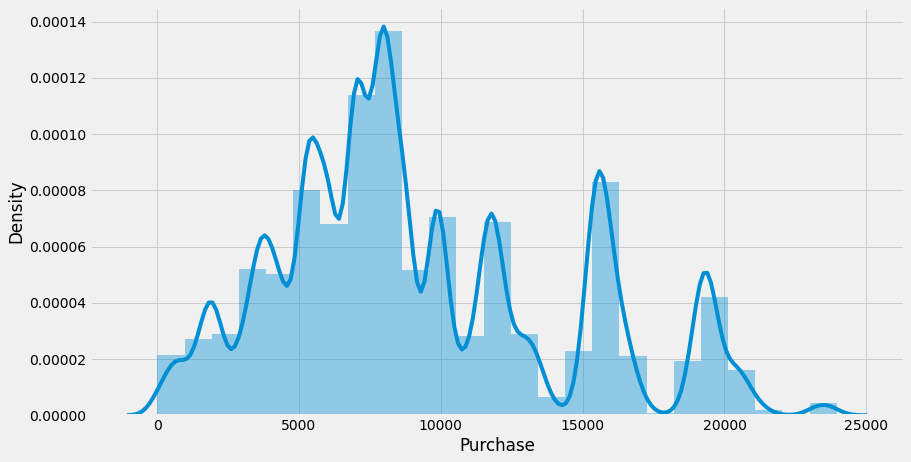

In [162]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(df['Purchase'], bins=25)

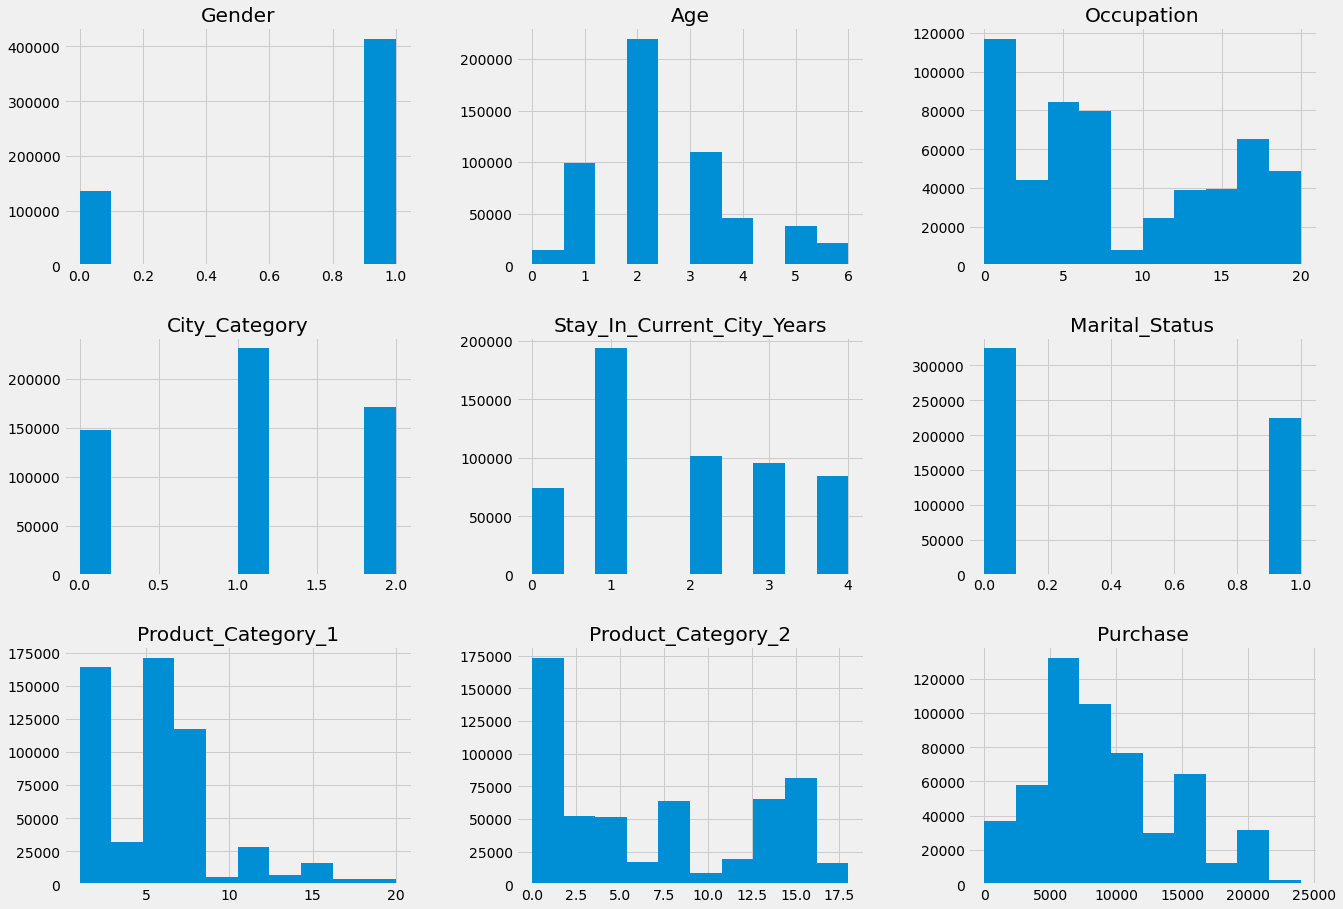

In [163]:
df.hist(figsize=(20,20), layout=(4,3), sharex=False);

Based on the histogram plot of count vs each column, we can infer several things about some columns - 
1. In gender column, 1 was assigned to male and 0 to female. From the count plot we can see that during black fridays matority of the male population contribute to the purchase count.
2. People with occupation 0 have the hightest count in black fridays.
3. City category 1 have the highest count 
4. People who have lived in the city for 1 year also tend to have a high count during black fridays.
5. Assuming 0 for unmarried people and 1 for married people, unmarried people tend to have a higher count during black fridays.
6. Product category 2 also has a significant number of missing values.  

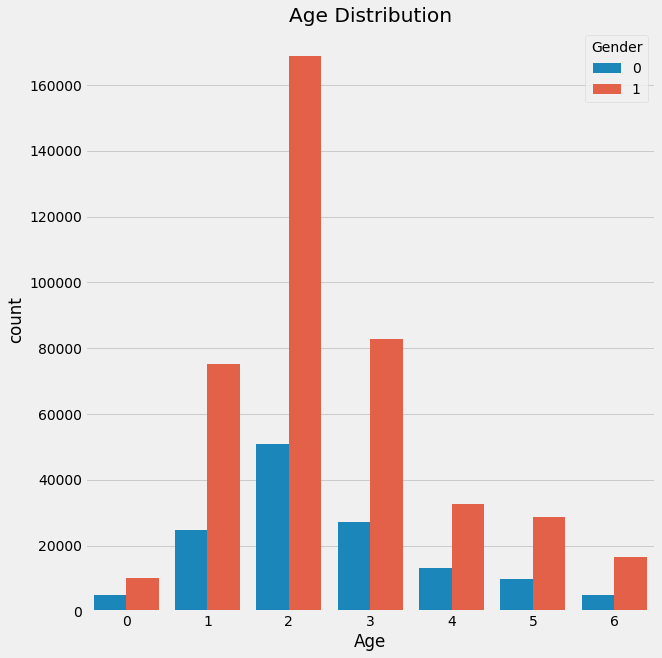

In [164]:
#Age & Gender count
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 2)
sns.countplot(x = 'Age', data = df, hue = 'Gender')

plt.title('Age Distribution', loc = 'center')
plt.show()

The count of males across all age groups is higher than their female counterparts. 

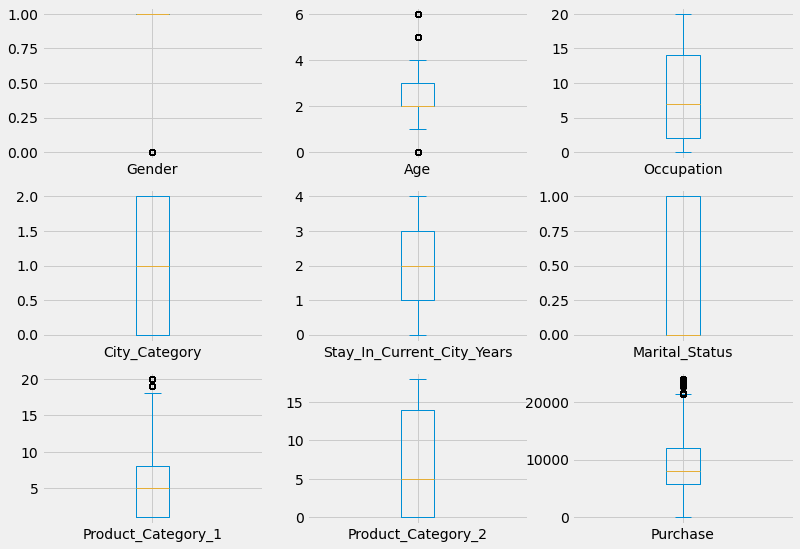

In [165]:
df.plot(kind='box', figsize=(12,12),layout=(4,3), sharex=False, subplots=True);

For the columns, Product_Category_1, Product_Category_2 there are not a lot of outliiers present.

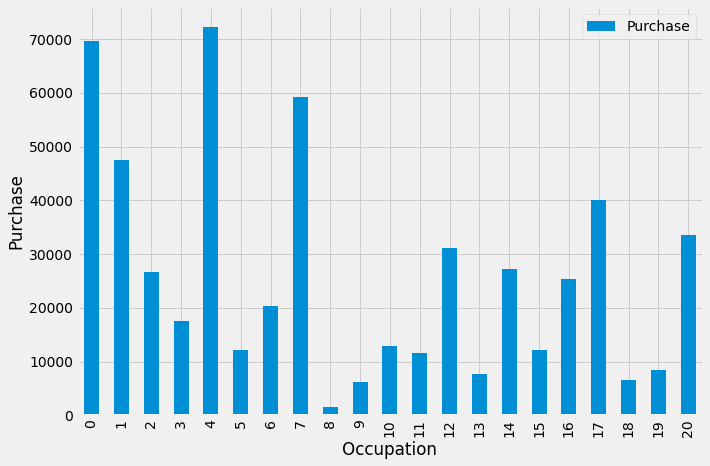

In [166]:
#Occupation 
occ = df.groupby('Occupation').agg({'Purchase':'count'})
occ.reset_index(inplace = True)
occ.plot(x = 'Occupation', y = 'Purchase', ylabel = 'Purchase', kind = 'bar', figsize = (10,7))

People in occupation 8 have the lowest purchase. In contrast, occupation 0, 4 & 7 have the highest amount of purchase.

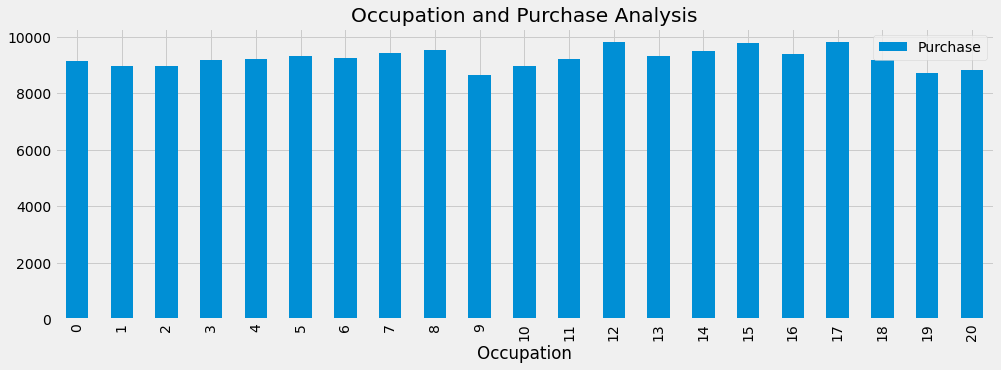

In [167]:
occupation = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occupation.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Some occupations which have higher representations, but on average, the spending is approximately same for all occupations.


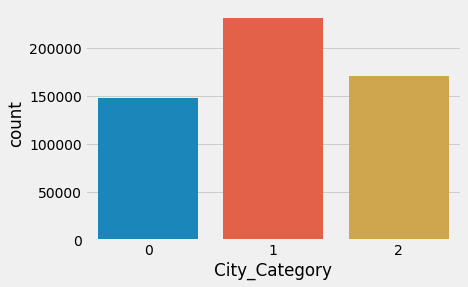

In [168]:
#City Category
sns.countplot(df['City_Category'])

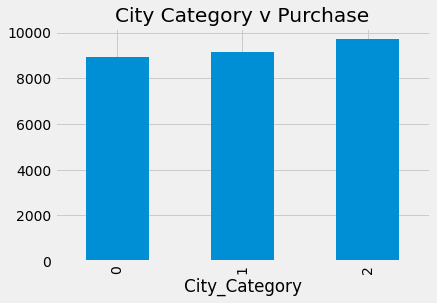

In [169]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category v Purchase")
plt.show()

Although the count of city category B is the highest, city gategory C are the one with the highest amoung of purchase.

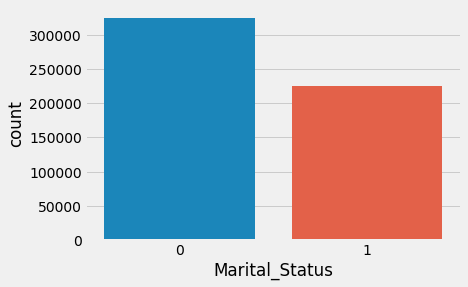

In [170]:
#Marital Status 
sns.countplot(df['Marital_Status'])
plt.show()

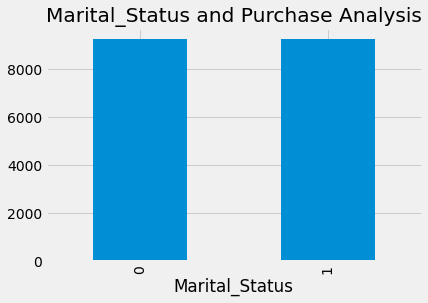

In [171]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

Assuming 0 is for unmarried people, we observe that there are more unmarried people but spending more on purchasing, but the average purchase amount of married and unmarried people are the same.

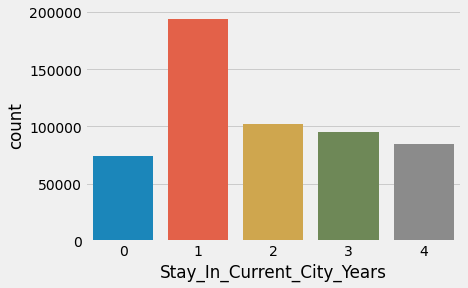

In [172]:
#Stay In Current City
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()

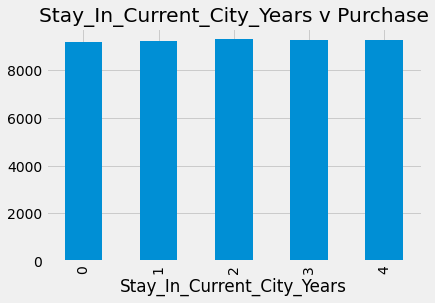

In [173]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years v Purchase")
plt.show()

There is a high count of people who have lived in a city upto 1 year. But in terms of purchase amount for each category value is approximately the same. 

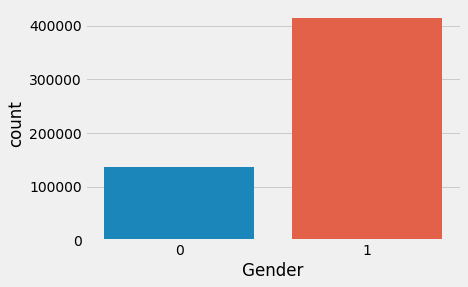

In [174]:
#Gender
sns.countplot(df['Gender'])
plt.show()

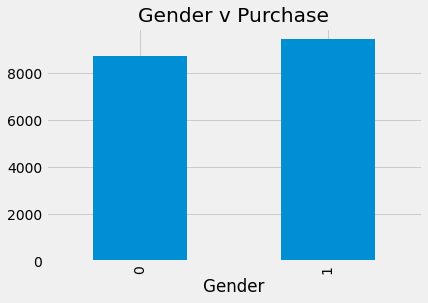

In [175]:
df.groupby("Gender").mean()["Purchase"].plot(kind='bar')
plt.title("Gender v Purchase")
plt.show()

Although the count of males are higher than females during black fridays, the purchase by both genders are comparable. 

In [176]:
#plot color scaled correlation matrix
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.343703
Product_Category_2,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.052288
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,0.052288,1.000000


The variables in this dataset do show too much of correlation. Only Age and Marital Status are slightly correlated. 

##**Train & Test data Split**

In [177]:
X = df.loc[:, ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Occupation']]
y = df.loc[:, 'Purchase']

In [178]:
#Train test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")

The shape of X_train is: (440054, 8)
The shape of X_test is: (110014, 8)


##**PCA**

In [179]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_val = sc.transform(X_test)

In [180]:
from sklearn.decomposition import PCA

In [181]:
pca = PCA(0.80)

In [182]:
pca.fit(x_train)

PCA(n_components=0.8)

In [183]:
pca.n_components_

6

In [184]:
x_train=pca.transform(x_train)
x_val=pca.transform(x_val)

In [185]:
x_train

array([[-2.27696401,  0.7114318 ,  0.49925092,  0.25251111, -0.36777273,
        -0.70571082],
       [-2.29134573,  0.37883504, -0.4066891 ,  0.05427734,  0.11810938,
        -0.79008337],
       [-2.02315497,  1.61264289,  1.79196966,  0.71108796,  0.52943287,
         0.62085366],
       ...,
       [-1.05096465, -0.79980145, -1.62842491,  1.12955822,  1.05399116,
        -0.77108471],
       [-1.18421637, -0.56911693, -0.22538734,  1.31942475, -0.75885119,
        -1.44452967],
       [-1.08541911, -0.12446946,  0.55537738,  1.55534595, -0.58851352,
        -0.92508531]])

In [186]:
x_train.shape


(440054, 6)

In [187]:
x_val.shape

(110014, 6)

##**Linear Regression**

In [188]:
reg = LinearRegression()
model_lor = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [189]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Regression Intercept: ', reg.intercept_)
print('R2 Score: ', metrics.r2_score(y_test, y_pred))


Mean Absolute Error:  3609.631716733107
Mean Squared Error:  21775282.91087255
Root Mean Squared Error:  4666.399351842119
Regression Intercept:  10270.589603243308
R2 Score:  0.19257160471030932


The mean absolute error (MAE) is a measure of the average magnitude of the errors in a set of predictions, without considering their direction. It is calculated as the average of the absolute differences between the predicted values and the true values. In this case, the MAE is 3609.631716733107.

The mean squared error (MSE) is a measure of the average of the squares of the errors. It is calculated as the average of the squares of the differences between the predicted values and the true values. In this case, the MSE is 21775282.91087255. And the root mean squared error (RMSE) is the square root of the MSE. In this case, the RMSE is 4666.399351842119.

The regression intercept is the value of the predicted response when all predictor variables are zero. In this case, the regression intercept is 10270.589603243308.

The R2 score, or coefficient of determination, is a measure of how well the predicted values match the true values. It is calculated as 1 minus the ratio of the sum of squared errors of the prediction to the total sum of squares of the true values. In this case, the R2 score is 0.19257160471030932.

Based on the observed values, we can infer that linear regression did not work well this dataset as we can see high values of errors.

In [190]:
print("Training data score: {:,.3%}".format(reg.score(X_train, y_train)))
print("Test data score: {:,.3%}".format(reg.score(X_test, y_test)))

Training data score: 10.571%
Test data score: 19.257%


We can see that linear regression did not work well with this dataset. We get poor accuracy and high error values. We will have to try a different model on this.

In [191]:
coeff = pd.DataFrame(reg.coef_, X.columns, columns = ['Coefficient'])
coeff

,Coefficient
Gender,521.509765
Age,113.360316
City_Category,366.876607
Stay_In_Current_City_Years,8.832168
Marital_Status,-47.541008
Product_Category_1,-412.560779
Product_Category_2,20.030209
Occupation,6.490575


**INTERPRETING COEFFICIENTS -**

* Linear regression coefficients can tell us about negative or positive correlation between independent and dependent variables, by looking at their signs. 

* Increase in independent variable resulting in increase in mean of dependent variable is indicated by having a positive coefficient.

* In contrast, a negative coefficient means that increase in independent variable results in decrease of mean of the dependent variable. 


1. For product category 2, keeping all other variables fixed, change in one unit will result in purchase increasing by 20.03 units.     
3. Finally for Product_Category_1, keeping all other variables fixed, if there is change by one unit then the Purchase variable changes by -412.56 units. The negative value indicates a decrease in the target variable (Purchase).



In [192]:
var = sm.OLS(df['Purchase'], 
             df[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Occupation']]).fit()

var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Purchase   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.735
Method:                 Least Squares   F-statistic:                          1.910e+05
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:38:59   Log-Likelihood:                     -5.5101e+06
No. Observations:              550068   AIC:                                  1.102e+07
Df Residuals:                  550060   BIC:                                  1.102e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Gender                      3317.6631     15.325    216.480      0.000    3287.626    3347.701
Age                          859.2483      5.393    159.332      0.000     848.679     869.818
City_Category               1405.1658      9.270    151.583      0.000    1386.997    1423.335
Stay_In_Current_City_Years   765.9841      5.292    144.732      0.000     755.611     776.357
Marital_Status               421.3570     15.596     27.016      0.000     390.789     451.925
Product_Category_1          -172.6296      1.728    -99.886      0.000    -176.017    -169.242
Product_Category_2           150.9450      1.127    133.917      0.000     148.736     153.154
Occupation                    95.2834      1.109     85.945      0.000      93.110      97.456
==============================================================================
Omnibus:                    16330.075   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17825.752
Skew:                           0.440   Prob(JB):                         0.00
Kurtosis:                       2.955   Cond. No.                         29.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Purchase is our target value here. All the independent variables have p-values < 0.05, therefore they're all significant variables. But, over here we are not able to detetermine how significant each of them are.  


In [193]:
var.rsquared

0.7352543672740247

* The amount of variation in the output dependent characteristic that can be predicted from the input independent variables is known as the coefficient of determination, or R2 score.

* From the above dataset, we can observe that 73% of the changeability of the dependent output attribute can be explained by the model while the remaining 27% of the variability is still unaccounted for.

##**Random Forest** 


In [194]:
X_train = x_train
X_test = x_val

In [195]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  
model_reg = RFregressor.fit(X_train, y_train)

In [196]:
rf_y_pred = RFregressor.predict(X_test)

In [197]:
from math import sqrt

print("Training Data Score: {:,.3%}".format(RFregressor.score(X_train, y_train)))
print("Test Data Score: {:,.3%}".format(RFregressor.score(X_test, y_test)))

print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, rf_y_pred))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, rf_y_pred))
print("Root Mean Square Error - ",sqrt(metrics.mean_squared_error(y_test, rf_y_pred)))
print("R2 Score - ", metrics.r2_score(y_test, rf_y_pred))

Training Data Score: 73.168%
Test Data Score: 61.874%
Mean Absolute Error -  2380.4272984375266
Mean Squared Error -  10282094.237300236
Root Mean Square Error -  3206.5704790788923
R2 Score -  0.6187395183694522


The dataset gives us significantly better scores with Random Forest regressor than linear regressor. The errors have also reduced in comparison to linear regression model. There are varoius other models like Stacked Ensemble model or GBM which may give us better accuracy.

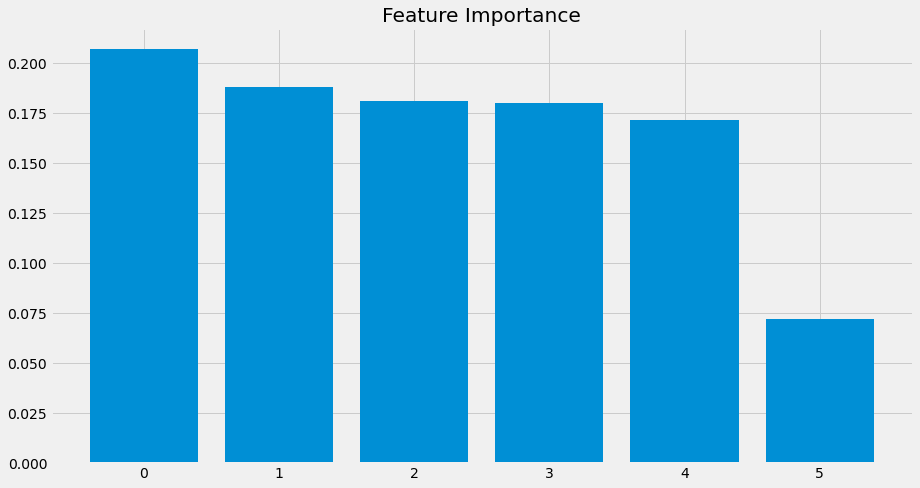

In [198]:
importances = RFregressor.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize = (13,7))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
#plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

We can see the significance of all features are comparitively significant. Except feature 5 all other features show good level of significance.


**Number of Trees**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Here, since we have not mentioned the number of n_estimators explicitly, therefore the default value is taken as 10. 



##**H2O Auto ML**

In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 29 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=882bcd79f1091794540bb97f36b2f1aa0a9e67624fc0483f0b984091d44766c4
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


In [140]:
import h2o
from h2o.automl import H2OAutoML

#Initialising H2O instance
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 mins 02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_8w3sz6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.711 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [141]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dfcopy_reg = data

myY = "Purchase"
myX = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1", "Product_Category_2"]

In [ ]:
#Splitting data into training, test and validation sets
df_train,df_test,df_valid = dfcopy_reg.split_frame(ratios=[.7, .15])

print ("Rows in Train",df_train.nrow)
print ("Rows in Validation",df_valid.nrow)
print ("Rows in Test",df_test.nrow)

Rows in Train 385311
Rows in Validation 82437
Rows in Test 82320


In [134]:
ml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)
ml.train(x = myX, y = myY, training_frame = df_train, validation_frame = df_valid)

AutoML progress: |
03:11:35.186: Project: AutoML_1_20221216_31135
03:11:35.188: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:11:35.193: Setting stopping tolerance adaptively based on the training frame: 0.0016109953846409637
03:11:35.194: Build control seed: 10
03:11:35.195: training frame: Frame key: AutoML_1_20221216_31135_training_py_6_sid_90df    cols: 9    rows: 385311  chunks: 4    size: 3181284  checksum: -5112001522661241
03:11:35.195: validation frame: Frame key: py_8_sid_90df    cols: 9    rows: 82437  chunks: 4    size: 682572  checksum: -665033988731736
03:11:35.196: leaderboard frame: Frame key: py_8_sid_90df    cols: 9    rows: 82437  chunks: 4    size: 682572  checksum: -665033988731736
03:11:35.196: blending frame: NULL
03:11:35.196: response column: Purchase
03:11:35.196: fold column: null
03:11:35.196: weights column: null
03:11:35.239: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20221216_31135


Model Summary: 
    number_of_trees
--  -----------------
    55

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 7877568.666206378
RMSE: 2806.700672712781
MAE: 2093.9191326605896
RMSLE: NaN
Mean Residual Deviance: 7877568.666206378

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 8500058.760186374
RMSE: 2915.4860246940602
MAE: 2170.5882248983753
RMSLE: NaN
Mean Residual Deviance: 8500058.760186374

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-12-16 03:13:39  0.003 sec   0                  10535.8          9263.02         1.11003e+08          10540.1            9261.2            1.11093e+08
    2022-12-16 03:13:41  2.112 sec   5                  3621.45          2755.12         1.31149e+07          3635.13            2768.55           1.32142e+07
    2022-12-16 03:13:43  3.942 sec   10                 3028.3           2306.65         9.17063e+06          3053.59            2327.17           9.3244e+06
    2022-12-16 03:13:45  6.142 sec   15                 2906.73          2190.82         8.44907e+06          2942.72            2216.72           8.65957e+06
    2022-12-16 03:13:48  9.199 sec   20                 2880.11          2159.54         8.29506e+06          2926.71            2192.41           8.56566e+06
    2022-12-16 03:13:51  11.915 sec  25                 2861.98          2141.63         8.19095e+06          2921.09            2182.72           8.53277e+06
    2022-12-16 03:13:54  15.026 sec  30                 2847.46          2127.69         8.10805e+06          2916.37            2175.67           8.50519e+06
    2022-12-16 03:13:57  18.293 sec  35                 2838.45          2120.4          8.05682e+06          2916.47            2175.06           8.50579e+06
    2022-12-16 03:14:00  21.861 sec  40                 2828.77          2112.22         8.00194e+06          2915.34            2172.87           8.49919e+06
    2022-12-16 03:14:04  25.752 sec  45                 2820.19          2105.4          7.95345e+06          2915.32            2171.82           8.4991e+06
    2022-12-16 03:14:09  29.946 sec  50                 2813.22          2099.78         7.91422e+06          2914.61            2170.54           8.49497e+06
    2022-12-16 03:14:15  35.901 sec  55                 2806.7           2093.92         7.87757e+06          2915.49            2170.59           8.50006e+06

Variable Importances: 
variable                    relative_importance    scaled_importance    percentage
--------------------------  ---------------------  -------------------  ------------
Product_Category_1          7.02725e+12            1                    0.865005
Product_Category_2          4.47922e+11            0.0637407            0.0551361
Occupation                  2.065e+11              0.0293856            0.0254187
Stay_In_Current_City_Years  1.44315e+11            0.0205364            0.0177641
Age                         1.24314e+11            0.0176903            0.0153022
City_Category               8.47005e+10            0.0120532            0.010426
Gender                      4.78298e+10            0.00680633           0.00588752
Marital_Status              4.11082e+10            0.00584983           0.00506014

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [135]:
lb = ml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_2_AutoML_1_20221216_31135,2915.49,8.50006e+06,2170.59,nan,8.50006e+06
GBM_1_AutoML_1_20221216_31135,2916.98,8.50874e+06,2175.24,nan,8.50874e+06
GBM_4_AutoML_1_20221216_31135,2925.46,8.55829e+06,2191.91,nan,8.55829e+06
XGBoost_1_AutoML_1_20221216_31135,2934.77,8.61289e+06,2171.24,nan,8.61289e+06
XGBoost_3_AutoML_1_20221216_31135,2938.71,8.636e+06,2201.15,nan,8.636e+06
GBM_3_AutoML_1_20221216_31135,2941.53,8.65258e+06,2207.12,nan,8.65258e+06
GBM_2_AutoML_1_20221216_31135,2951.41,8.71081e+06,2216.25,nan,8.71081e+06
DRF_1_AutoML_1_20221216_31135,2971.27,8.82842e+06,2200.02,0.410548,8.82842e+06
XRT_1_AutoML_1_20221216_31135,3449.79,1.19011e+07,2628.05,0.573209,1.19011e+07
GLM_1_AutoML_1_20221216_31135,5032.22,2.53232e+07,4081.68,0.767853,2.53232e+07


In [136]:
df_pred=ml.leader.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [137]:
df_pred.head()

predict
1525.2
7941.17
15485.3
5651.95
6585.63
6585.63
8694.4
11815.1
6658.34
7826.49


In [138]:
ml.leader.model_performance(df_test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 8447397.646806363
RMSE: 2906.4407179239633
MAE: 2166.854336234299
RMSLE: NaN
Mean Residual Deviance: 8447397.646806363

In [139]:
lb = ml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_2_AutoML_1_20221216_31135,2915.49,8.50006e+06,2170.59,nan,8.50006e+06
GBM_1_AutoML_1_20221216_31135,2916.98,8.50874e+06,2175.24,nan,8.50874e+06
GBM_4_AutoML_1_20221216_31135,2925.46,8.55829e+06,2191.91,nan,8.55829e+06
XGBoost_1_AutoML_1_20221216_31135,2934.77,8.61289e+06,2171.24,nan,8.61289e+06
XGBoost_3_AutoML_1_20221216_31135,2938.71,8.636e+06,2201.15,nan,8.636e+06
GBM_3_AutoML_1_20221216_31135,2941.53,8.65258e+06,2207.12,nan,8.65258e+06
GBM_2_AutoML_1_20221216_31135,2951.41,8.71081e+06,2216.25,nan,8.71081e+06
DRF_1_AutoML_1_20221216_31135,2971.27,8.82842e+06,2200.02,0.410548,8.82842e+06
XRT_1_AutoML_1_20221216_31135,3449.79,1.19011e+07,2628.05,0.573209,1.19011e+07
GLM_1_AutoML_1_20221216_31135,5032.22,2.53232e+07,4081.68,0.767853,2.53232e+07


We observe XG Boost is the best fit model for this dataset with mae of 2170.59.57. 

##**Shapley Values**

In [ ]:
!pip install shap

import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
from h2o.estimators import H2ORandomForestEstimator

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20221216_31135,2717.11,7.38271e+06,2006.22,0.384101,7.38271e+06,67871,0.031175,DRF
XGBoost_1_AutoML_1_20221216_31135,2783.42,7.74744e+06,2062.73,nan,7.74744e+06,69724,0.013722,XGBoost
XGBoost_2_AutoML_1_20221216_31135,2838.33,8.05614e+06,2116.32,nan,8.05614e+06,43344,0.006783,XGBoost
GBM_1_AutoML_1_20221216_31135,2873.85,8.25903e+06,2144.16,nan,8.25903e+06,49011,0.024218,GBM
GBM_4_AutoML_1_20221216_31135,2884.66,8.32127e+06,2164.39,nan,8.32127e+06,22779,0.01956,GBM
GBM_3_AutoML_1_20221216_31135,2920.63,8.5301e+06,2194.41,nan,8.5301e+06,21401,0.019426,GBM
XGBoost_3_AutoML_1_20221216_31135,2926.74,8.56579e+06,2193.95,nan,8.56579e+06,88775,0.007692,XGBoost
GBM_2_AutoML_1_20221216_31135,2939.26,8.63924e+06,2210.06,nan,8.63924e+06,18156,0.017677,GBM
XRT_1_AutoML_1_20221216_31135,3412.95,1.16482e+07,2597.64,0.568001,1.16482e+07,46339,0.021338,DRF
GLM_1_AutoML_1_20221216_31135,5023.05,2.5231e+07,4069.85,0.764398,2.5231e+07,3970,0.000303,GLM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

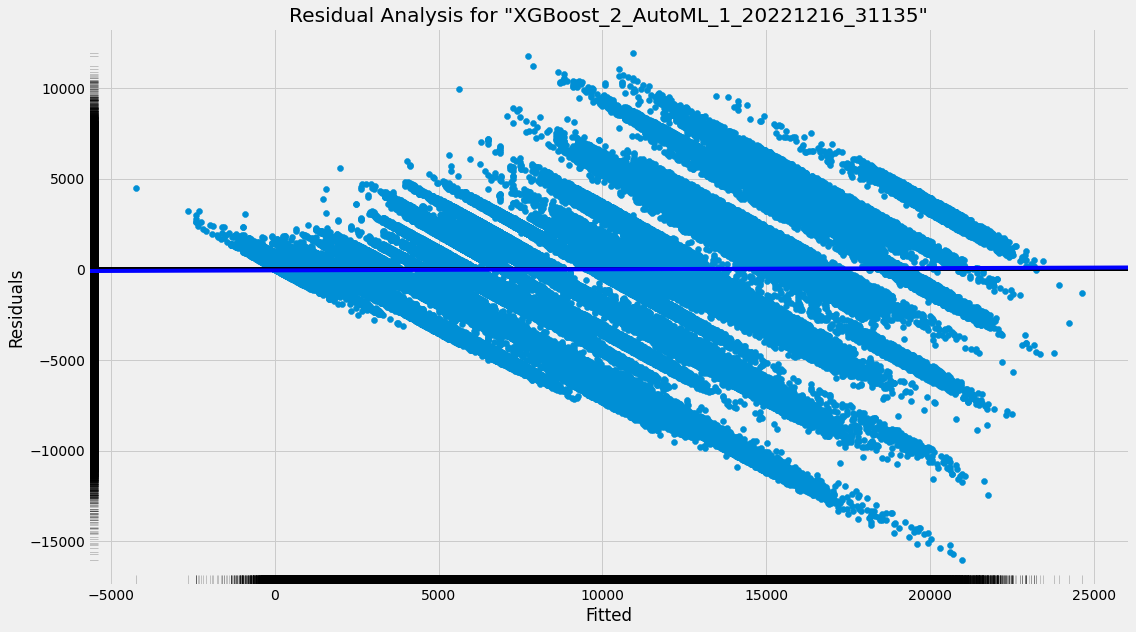

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

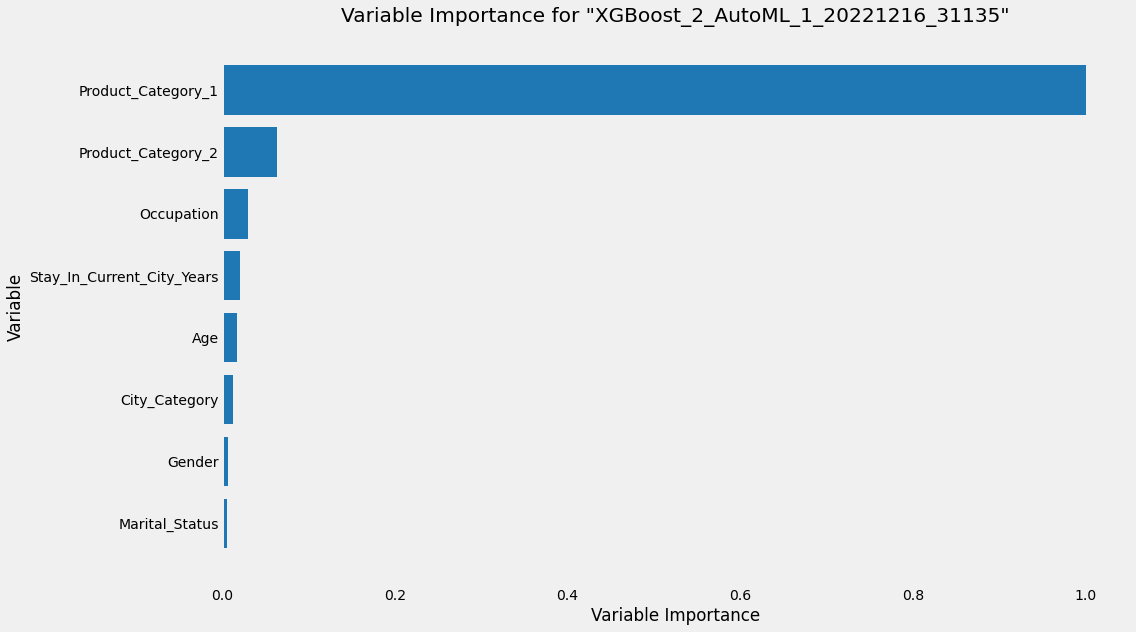

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

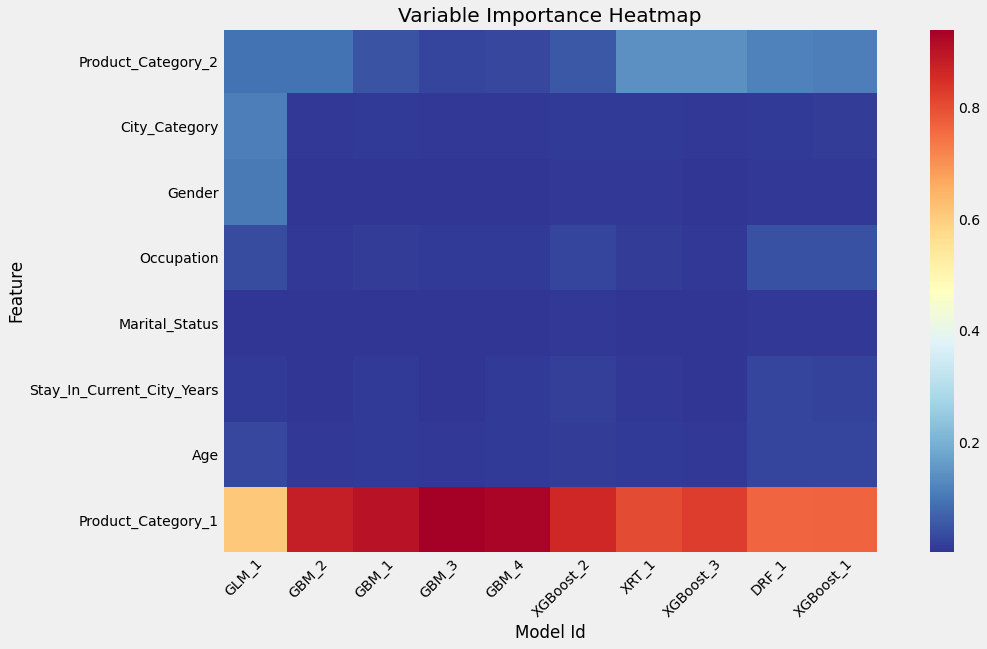

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

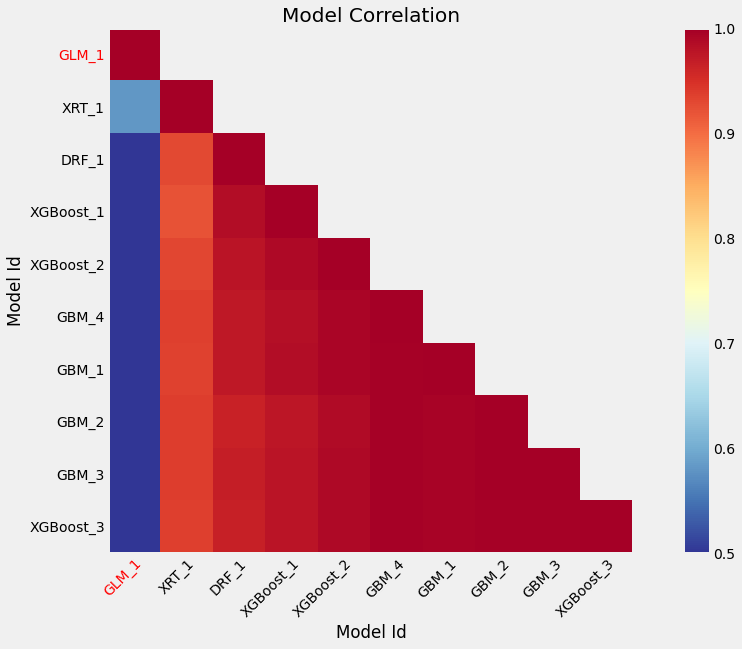

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

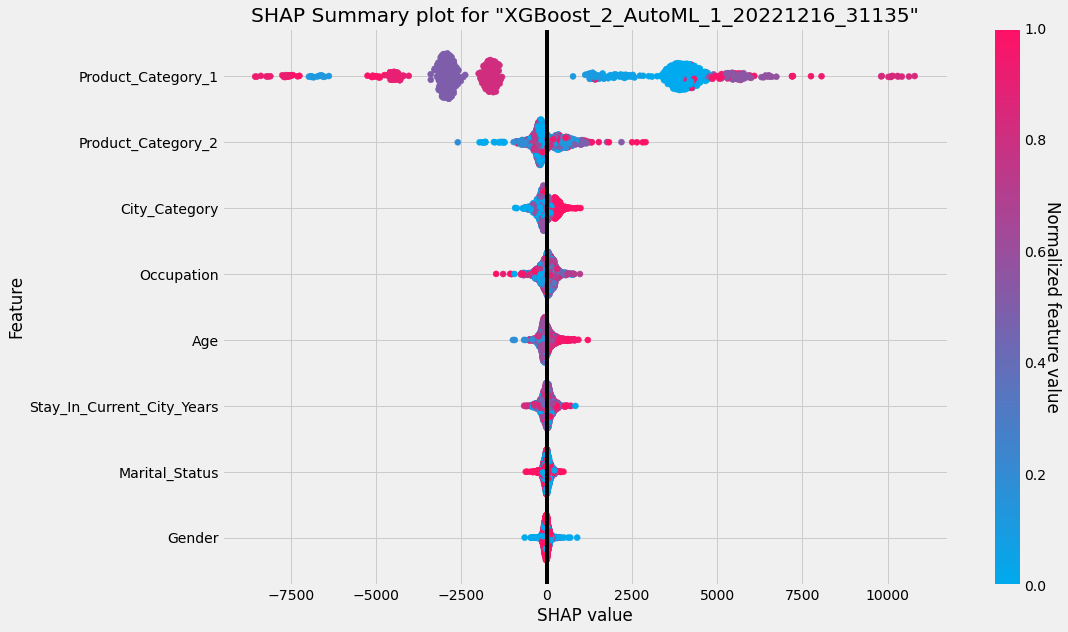

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

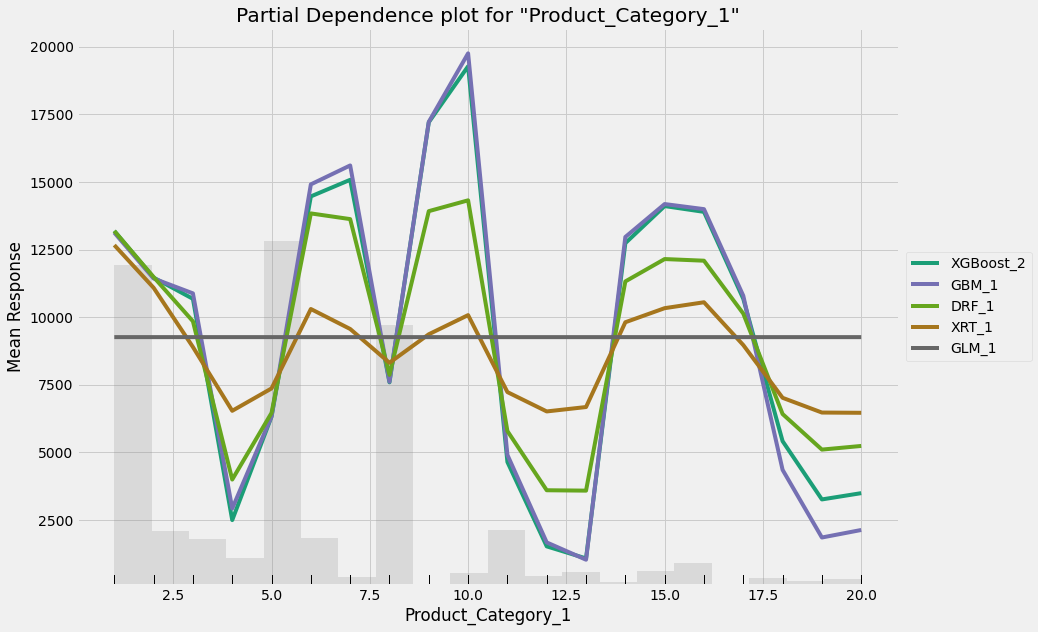

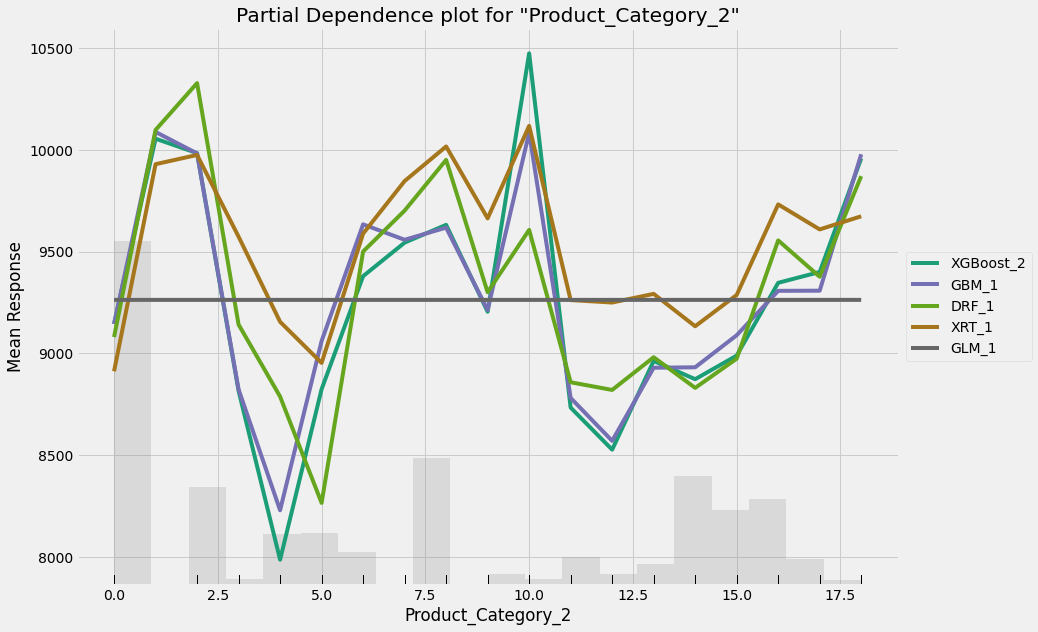

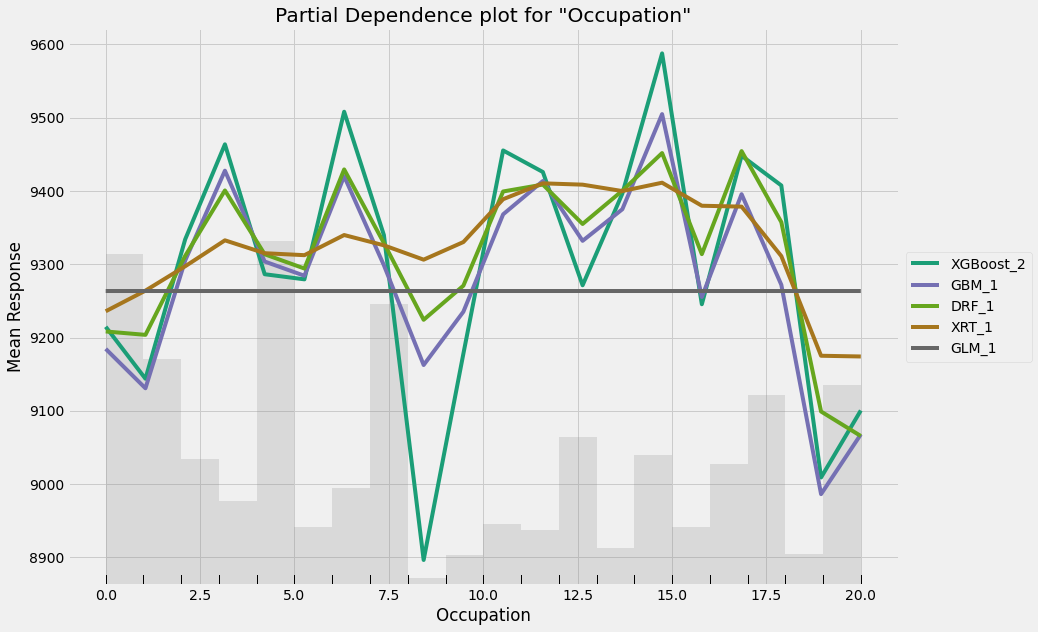

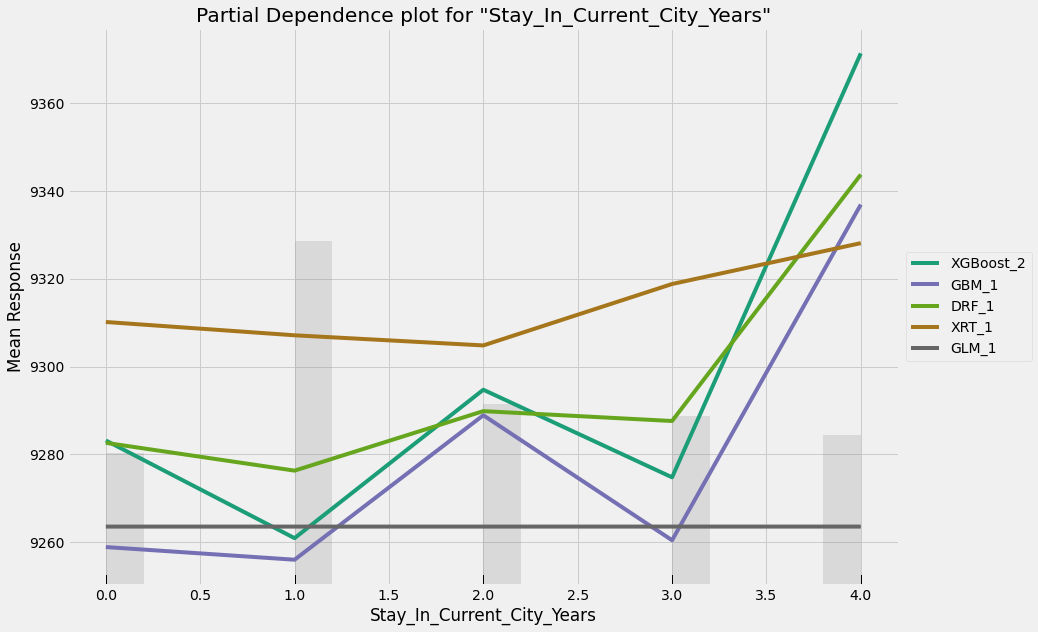

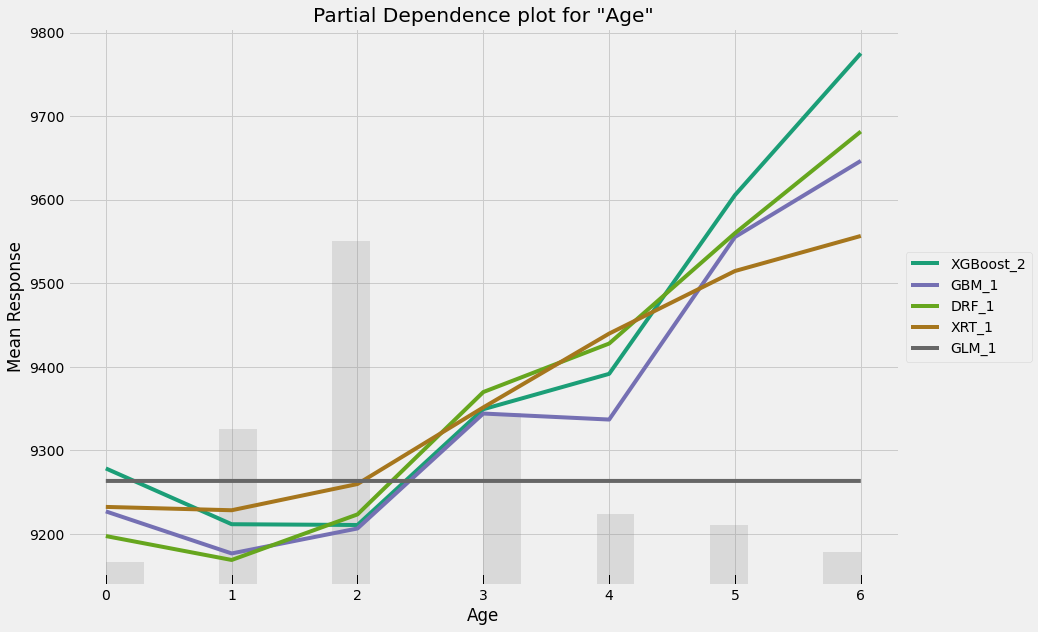

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

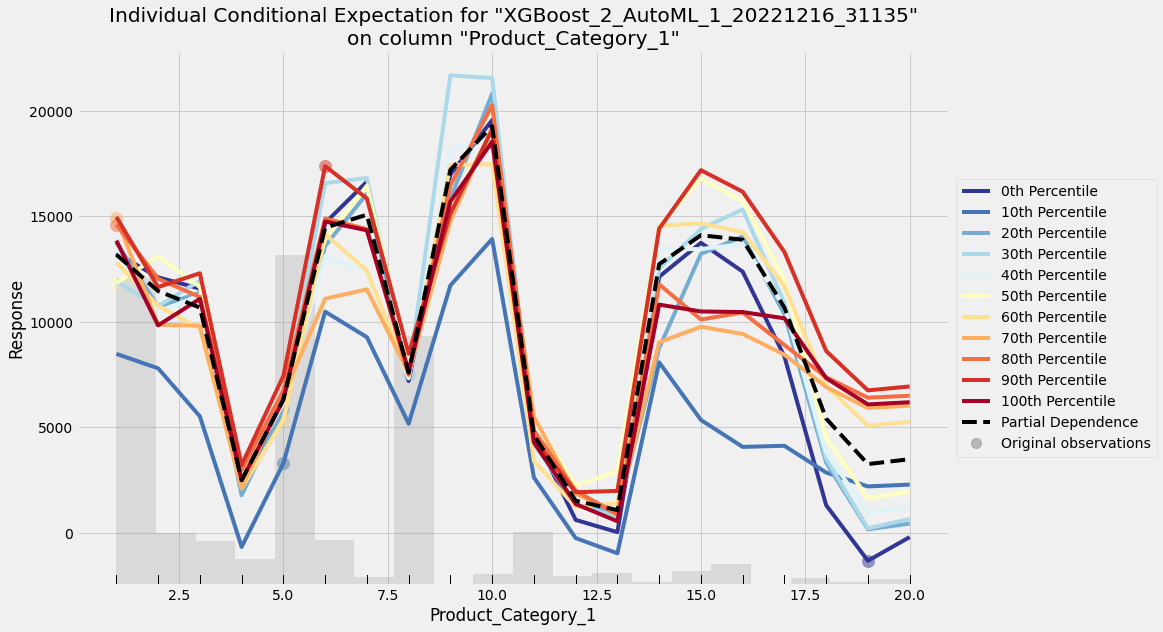

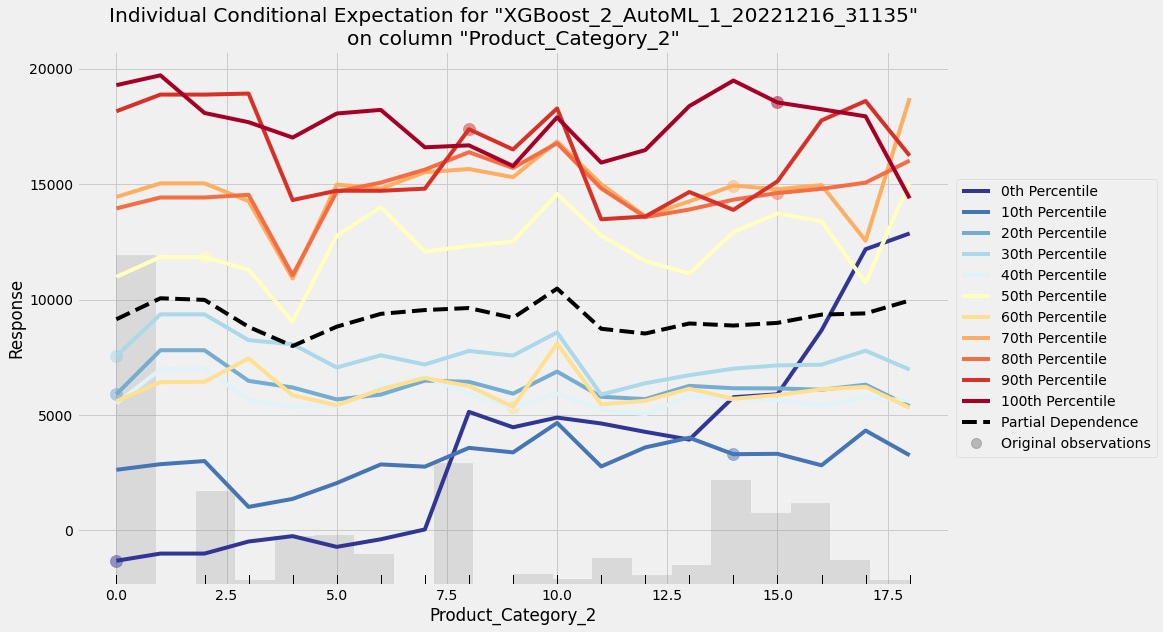

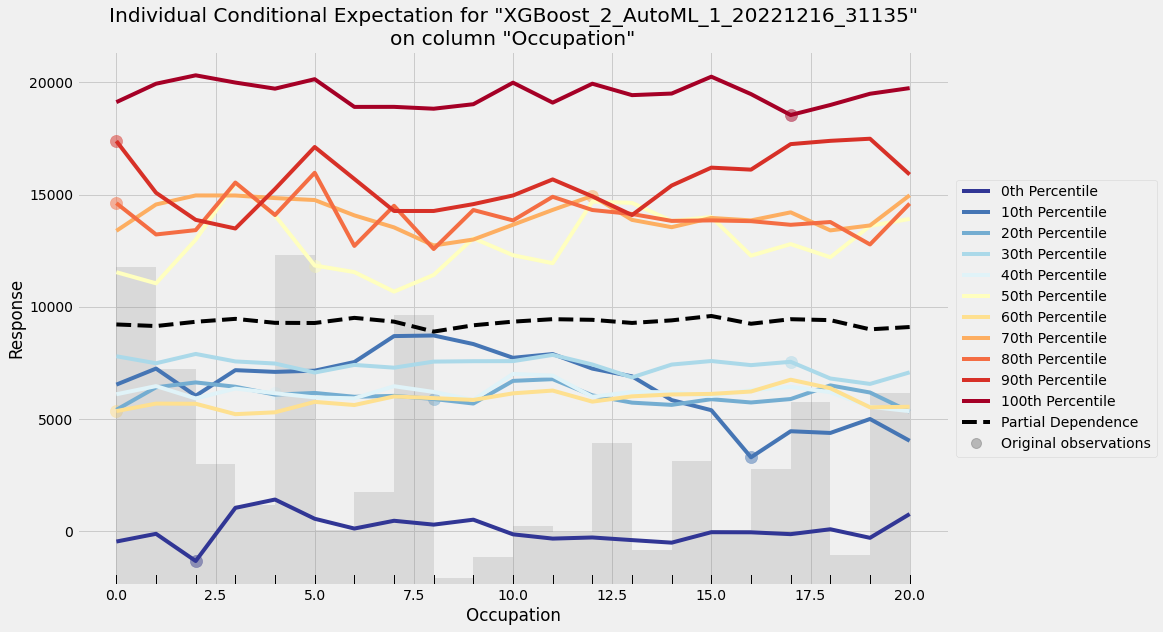

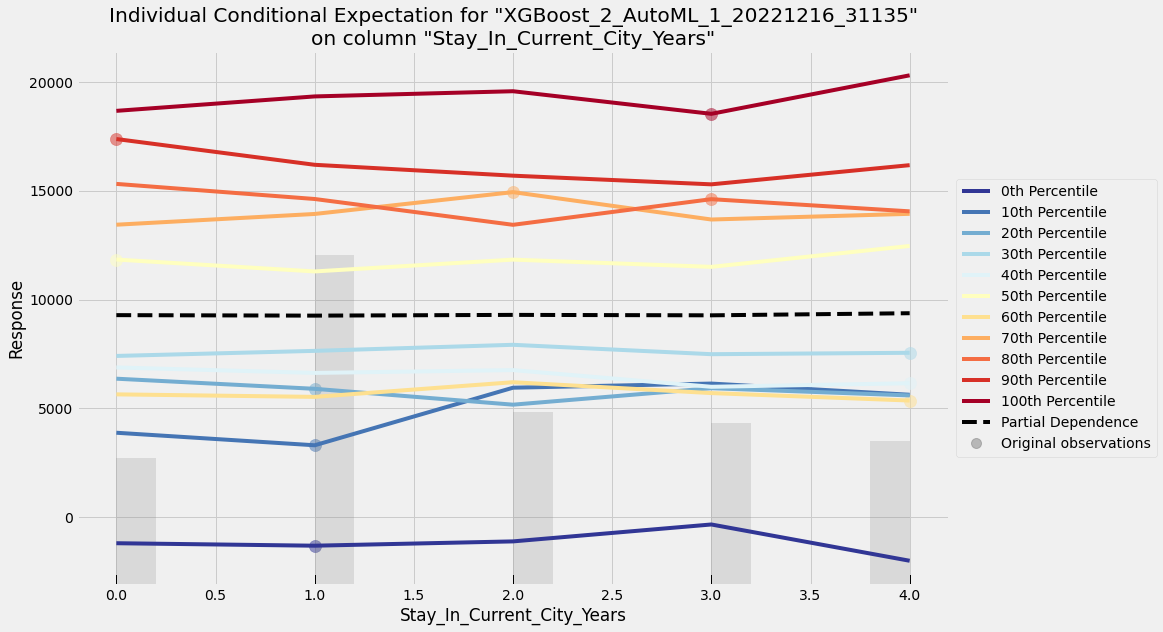

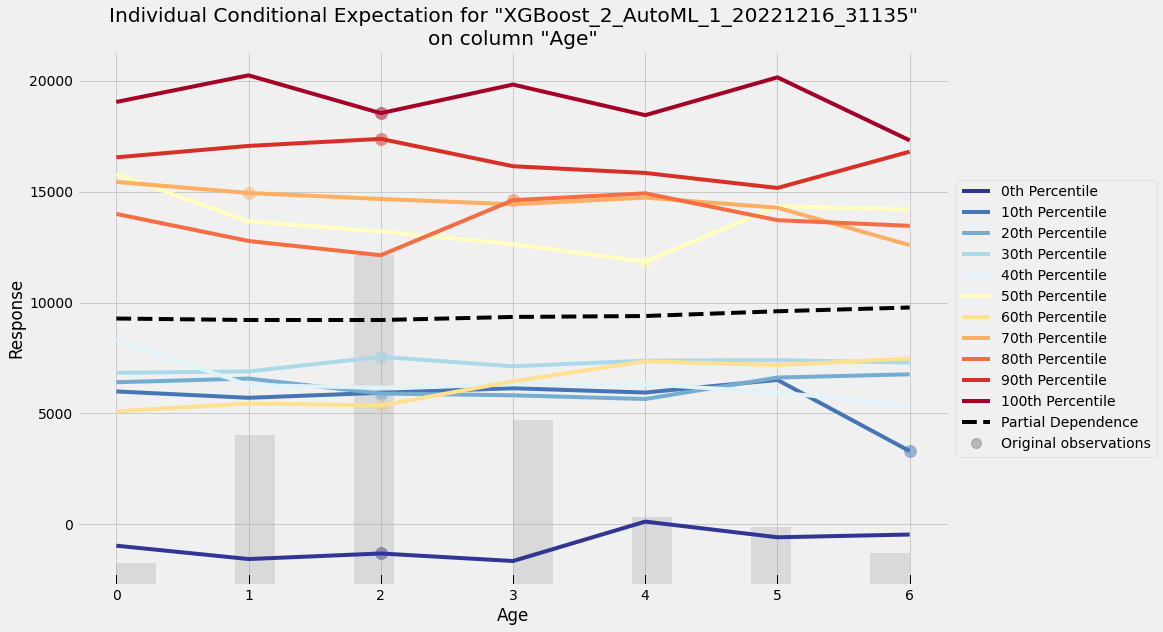

In [143]:
model_explain = ml.explain(data)

##**Conclusion**


  Since linear regression gave such poor results, random forest regressor was applied which gave significantly better results.

  Based on the analysis performed, Product Category 1 has the highest significance amogh all other variables 

##**Questions**


**1. What is the question?**
    
  The retail company is trying to understand the purchasing habits of their customers during the Black Friday sale by analyzing data on customer demographics, product information, and total purchase amounts for high volume products from the previous Black Friday period. They are interested in studying this data across various product categories. Our aim here is to predict the purchase amount based on the data they have provided.

**2. What did you do?**

  The dataset provided was large in size, and thus had to boil it down where the redundant information could be discarded, hence data cleaning was essential. Null values were processed and using label encoding the categorical values were converted to numerical values.
    
  Movin on to PCA, it helped in making the dataset compact without losing too much of its information. This was followed by linear regression which gave very poor results and hence Random forest regressor was applied to it. 
    
  Finally Auto ML was applied to check for the best model and Shap values to get feature importance.  

**3. How well did it work?**

  Linear regression gave us very poor results, resulting in me moving on to random forest regressor which gave me significantly better results. However the result can further be worked on using varoius other models like Stacked Ensemble model or GBM which may give us better accuracy.

**4. What did you learn?**

  Based on the analysis performed, Product Category 1 has the highest significance amogh all other variables 

  The data set is large in size. Random Forest Regressor worked well in comparison to linear regression but it could be further improved using other models like stacked ensemble or GBM etc.
 

##**References**

Sckit learn offcial documentation

h2o.ai Documentation

Kaggle

SHAP Documentation - https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

https://northeastern.instructure.com/courses/124209/pages/shap-values?module_item_id=7893705

https://christophm.github.io/interpretable-ml-book/shap.html#fn69

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://towardsdatascience.com/back-to-basics-assumptions-of-common-machine-learning-models-e43c02325535

Notebooks - 

Black_Friday_Sales.ipynb - https://colab.research.google.com/drive/1HvmVN07oUf7I2hxJ2kuoYVvMjganGfNc

AUTOML.ipynb - https://colab.research.google.com/drive/1QRUEACb1nf7qJq2GKgFV0JRqHZRmrE5c#scrollTo=MyjlaIosGBAx

Shap Values.ipynb - https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

https://www.kaggle.com/code/margesh/regression-scikit-xgb-h2o-automl



##**Copyright**



Copyright 2022 Anirudh Sampath Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.